### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

* 自变量：任务的条件，颜色和一致条件和颜色与文字不一致条件
* 因变量：每种条件下完成任务的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

* 假设集为一致文字条件下完成任务时间的总体均值 *$\mu_{Congruent}$* 与不一致文字条件下完成任务时间的总体均值*$\mu_{Incongruent}$*  ，零假设为两种条件下完成任务的平均时间相同，即*$H_0: \mu_{Congruent} - \mu_{Incongruent} = 0$*  ，对立假设为两种条件下完成任务的平均时间不同，即*$H_1:  \mu_{Congruent} - \mu_{Incongruent}  \neq 0$* 

* 选择的检验方法是配对样本T双尾检验
* 理由：对数据集观察后可知，我们只有样本数据，总体参数未知，而且样本容量只有24个少于30，符合T检验的前提，因此选用T检验，并且样本数据是同一对象的不同条件处理，因此选用配对样本T检验，由于对立假设中选取的总体均值差为不等于0，故选取双尾检验

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
df =  pd.read_csv('stroopdata.csv')

In [2]:
#查看数据整体情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Congruent    24 non-null     float64
 1   Incongruent  24 non-null     float64
dtypes: float64(2)
memory usage: 512.0 bytes


In [3]:
#查看数据描述统计
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


* 在数据集的集中趋势数据中，Congruent列均值为14.0511，中位数为14.3565，Incongruent列均值为22.0159，中位数为21.0175
* 在数据集的变异测量数据中，Congruent列标准差为3.5593，Incongruent标准差为22.0159，中位数为4.7971 

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

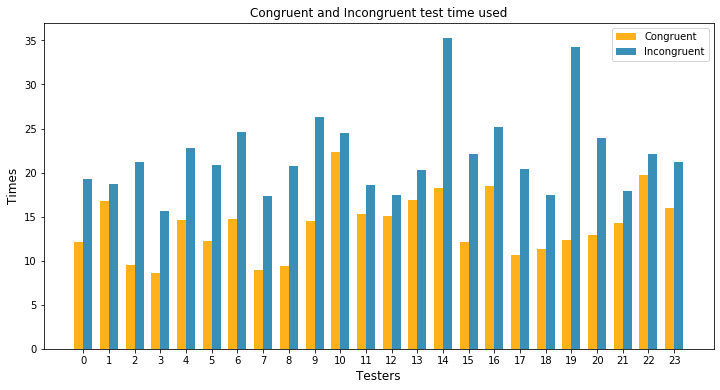

In [5]:
#两种条件下的条形图
ind = df.index  
width = 0.35

plt.figure(figsize = (12, 6))
p1 = plt.bar(ind - width/ 2, df.Congruent, width, facecolor = '#FFB11B') 
p2 = plt.bar(ind + width/ 2, df.Incongruent, width, facecolor = '#3A8FB7')

plt.xlabel('Testers', fontsize = 12)
plt.ylabel('Times', fontsize = 12)
plt.title('Congruent and Incongruent test time used', fontsize = 12)
plt.xticks(ind)
plt.legend((p1[0], p2[0]), ('Congruent', 'Incongruent'));

* 从条形如图可看出，同一个测试者，在颜色文字不一致的条件下完成测试的时间都比在颜色文字一致的条件下的时间长，因此增加一列不同颜色文字与相同颜色文字的时间差值列diff列，查看其分布

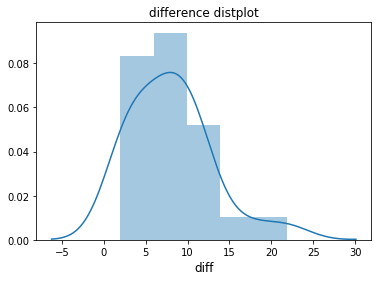

In [6]:
#创建差值列
df['diff'] = df.Incongruent - df.Congruent
#查看分布情况
sns.distplot(df['diff'])
plt.xlabel('diff', fontsize = 12)
plt.title('difference distplot', fontsize = 12);

* 从不同测试条件下的时间差值的分布情况可看出，分布趋势大致呈正态分布，符合T检验前提

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [7]:
#计算关键统计值
from scipy import stats
t, p_value = stats.ttest_rel(df.Congruent, df.Incongruent)
t, p_value

(-8.020706944109957, 4.103000585711178e-08)

根据计算结果，t统计量为-8.0207，p值为$4.1030\times 10^{-8} $  
选取95%的置信水平，显著水平$\alpha$ = 0.05，由于进行双尾检验，每侧为0.025  
在t检验自由度$\nu$  = 24 - 1 = 23下，查t检验表可知，此时t临界值为t = $\pm$2.069，t统计量-8.0207 < -2.069，且p值< 0.05，具有统计学意义

结论：  
在95%的置信水平下，可以拒绝零假设，即颜色和文字不同时完成任务的平均时间不同，也说明了斯特鲁普现象的存在，与之前的期望一致。

参考文档:  
1.https://en.wikipedia.org/wiki/Stroop_effect  
2.https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md  
3.http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf  
4.https://wiki.mbalib.com/wiki/T%E6%A3%80%E9%AA%8C  
5.http://laomeng.coding.me/dands/15503181479651.html  
6.https://blog.csdn.net/u010606346/article/details/84402398  
7.https://zhuanlan.zhihu.com/p/46355035 